In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
f  = open(r'C:\Users\jayes\Downloads\WhatsApp Chat with TYCS 2021-22 (1).txt','r',encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data)

24/11/20, 5:44 pm - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
25/06/19, 2:39 pm - +91 97683 13673 created group "SYCS20-21"
24/11/20, 5:44 pm - Tanvi added you
24/11/20, 7:07 pm - +91 93231 95120: https://forms.gle/ri89sDTELZYjuVsDA
24/11/20, 7:07 pm - +91 93231 95120: All the students have to fill this form compulsorily.
24/11/20, 7:09 pm - Tara: Done ma'am👍🏻
24/11/20, 7:13 pm - +91 77188 34675: This message was deleted
24/11/20, 7:13 pm - +91 77188 34675: This message was deleted
24/11/20, 7:20 pm - Trupti Ma'am: Tomorrow OS lecture will start at 7.20am
24/11/20, 7:20 pm - Tara: Ok ma'am
24/11/20, 8:14 pm - +91 93241 14596: https://forms.gle/ri89sDTELZYjuVsDA All the students have to fill this form compulsorily.
24/11/20, 8:53 pm - +91 93231 95120: Unit 1 for all subjects internals
24/11/20, 8:54 pm - +91 87935 59179: @10:30 graph theory Lec is there.....!
24/11/20, 10:27 pm - +91 93231 

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{1,2},\s\d{1,2}:\d{2}\s'

In [6]:
import re

date = re.findall(pattern,data)[1:]
len(date)

6182

In [7]:
import re
messages = re.split(pattern,data)[2:]
len(messages)

6182

In [8]:
clean_am = []
for i in messages:
    i = i.replace('am','')
    clean_am.append(i)

In [9]:
clean_am

['pm - +91 97683 13673 created group "SYCS20-21"\n',
 'pm - Tanvi added you\n',
 'pm - +91 93231 95120: https://forms.gle/ri89sDTELZYjuVsDA\n',
 'pm - +91 93231 95120: All the students have to fill this form compulsorily.\n',
 "pm - Tara: Done ma'👍🏻\n",
 'pm - +91 77188 34675: This message was deleted\n',
 'pm - +91 77188 34675: This message was deleted\n',
 "pm - Trupti Ma': Tomorrow OS lecture will start at 7.20\n",
 "pm - Tara: Ok ma'\n",
 'pm - +91 93241 14596: https://forms.gle/ri89sDTELZYjuVsDA All the students have to fill this form compulsorily.\n',
 'pm - +91 93231 95120: Unit 1 for all subjects internals\n',
 'pm - +91 87935 59179: @10:30 graph theory Lec is there.....!\n',
 'pm - +91 93231 95120: <Media omitted>\n',
 " - +91 87935 59179: You're invited to Tes meeting!\n\nGraph Theory\n\nhttps://tes.microsoft.com/l/meetup-join/19%3a7bf3416abc4b468e8829a3e6377274b1%40thread.tacv2/1606279101625?context=%7b%22Tid%22%3a%22405ddc34-d660-46e5-b52d-bfd0be156bb5%22%2c%22Oid%22%3a%224

In [10]:
clean_pm = []
for i in clean_am:
    i = i.replace('pm','')
    clean_pm.append(i)

In [11]:
clean_pm

[' - +91 97683 13673 created group "SYCS20-21"\n',
 ' - Tanvi added you\n',
 ' - +91 93231 95120: https://forms.gle/ri89sDTELZYjuVsDA\n',
 ' - +91 93231 95120: All the students have to fill this form compulsorily.\n',
 " - Tara: Done ma'👍🏻\n",
 ' - +91 77188 34675: This message was deleted\n',
 ' - +91 77188 34675: This message was deleted\n',
 " - Trupti Ma': Tomorrow OS lecture will start at 7.20\n",
 " - Tara: Ok ma'\n",
 ' - +91 93241 14596: https://forms.gle/ri89sDTELZYjuVsDA All the students have to fill this form compulsorily.\n',
 ' - +91 93231 95120: Unit 1 for all subjects internals\n',
 ' - +91 87935 59179: @10:30 graph theory Lec is there.....!\n',
 ' - +91 93231 95120: <Media omitted>\n',
 " - +91 87935 59179: You're invited to Tes meeting!\n\nGraph Theory\n\nhttps://tes.microsoft.com/l/meetup-join/19%3a7bf3416abc4b468e8829a3e6377274b1%40thread.tacv2/1606279101625?context=%7b%22Tid%22%3a%22405ddc34-d660-46e5-b52d-bfd0be156bb5%22%2c%22Oid%22%3a%22462ca505-4355-4a0b-9e48-902

In [12]:
df = pd.DataFrame({'messages':clean_pm, 'date':date})
df['date']  = pd.to_datetime(df['date'])
df.head()

,messages,date
0,"- +91 97683 13673 created group ""SYCS20-21""\n",2019-06-25 02:39:00
1,- Tanvi added you\n,2020-11-24 05:44:00
2,- +91 93231 95120: https://forms.gle/ri89sDTE...,2020-11-24 07:07:00
3,- +91 93231 95120: All the students have to f...,2020-11-24 07:07:00
4,- Tara: Done ma'👍🏻\n,2020-11-24 07:09:00


In [13]:
users = []
messages = []
for message in df['messages']:
    entry = re.split('-([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

In [14]:
df['users'] = users
df['messages'] = messages

In [15]:
df.head()

,messages,date,users
0,"- +91 97683 13673 created group ""SYCS20-21""\n",2019-06-25 02:39:00,group_notification
1,- Tanvi added you\n,2020-11-24 05:44:00,group_notification
2,https://forms.gle/ri89sDTELZYjuVsDA\n,2020-11-24 07:07:00,+91 93231 95120
3,All the students have to fill this form compul...,2020-11-24 07:07:00,+91 93231 95120
4,Done ma'👍🏻\n,2020-11-24 07:09:00,Tara


In [16]:
len(date)

6182

In [17]:
df.shape

(6182, 3)

In [18]:
df['year'] = df['date'].dt.year

In [19]:
df['month'] = df['date'].dt.month_name()

In [20]:
df['day'] = df['date'].dt.day

In [21]:
df['hour'] = df['date'].dt.hour

In [22]:
df['minutes'] = df['date'].dt.minute

In [23]:
df.drop(['date'],axis=1)

,messages,users,year,month,day,hour,minutes
0,"- +91 97683 13673 created group ""SYCS20-21""\n",group_notification,2019,June,25,2,39
1,- Tanvi added you\n,group_notification,2020,November,24,5,44
2,https://forms.gle/ri89sDTELZYjuVsDA\n,+91 93231 95120,2020,November,24,7,7
3,All the students have to fill this form compul...,+91 93231 95120,2020,November,24,7,7
4,Done ma'👍🏻\n,Tara,2020,November,24,7,9
...,...,...,...,...,...,...,...
6177,Krishna Jain SYBCOM\nVedansh Phalke SYBFM\nAdi...,+91 99204 68634,2021,October,11,10,18
6178,Anyone please share him basha no\n,+91 95275 77972,2021,October,11,11,40
6179,Him.vcf (file attached)\n,+91 86686 25439,2021,October,11,11,43
6180,15.11.2021 is the last date for the students f...,+91 99204 68634,2021,December,11,9,46


In [24]:
df['users']

0       group_notification
1       group_notification
2          +91 93231 95120
3          +91 93231 95120
4                     Tara
               ...        
6177       +91 99204 68634
6178       +91 95275 77972
6179       +91 86686 25439
6180       +91 99204 68634
6181               Shravan
Name: users, Length: 6182, dtype: object

In [25]:
new_user = []
for i in df['users']:
    i = re.sub(' ', '',i)
    new_user.append(i)
df['new_user'] = new_user

In [26]:
df

,messages,date,users,year,month,day,hour,minutes,new_user
0,"- +91 97683 13673 created group ""SYCS20-21""\n",2019-06-25 02:39:00,group_notification,2019,June,25,2,39,group_notification
1,- Tanvi added you\n,2020-11-24 05:44:00,group_notification,2020,November,24,5,44,group_notification
2,https://forms.gle/ri89sDTELZYjuVsDA\n,2020-11-24 07:07:00,+91 93231 95120,2020,November,24,7,7,+919323195120
3,All the students have to fill this form compul...,2020-11-24 07:07:00,+91 93231 95120,2020,November,24,7,7,+919323195120
4,Done ma'👍🏻\n,2020-11-24 07:09:00,Tara,2020,November,24,7,9,Tara
...,...,...,...,...,...,...,...,...,...
6177,Krishna Jain SYBCOM\nVedansh Phalke SYBFM\nAdi...,2021-10-11 10:18:00,+91 99204 68634,2021,October,11,10,18,+919920468634
6178,Anyone please share him basha no\n,2021-10-11 11:40:00,+91 95275 77972,2021,October,11,11,40,+919527577972
6179,Him.vcf (file attached)\n,2021-10-11 11:43:00,+91 86686 25439,2021,October,11,11,43,+918668625439
6180,15.11.2021 is the last date for the students f...,2021-12-11 09:46:00,+91 99204 68634,2021,December,11,9,46,+919920468634


In [27]:
new_df = df[df['new_user']=='Shravan']
new_df['messages'].shape[0]

364

In [28]:
df= df.drop(['users'],axis=1)

In [29]:
words = []
for i in df['messages']:
    words.extend(i.split())

In [30]:
len(words)

131643

In [31]:
num_media_messages = df[df['messages'] =='<Media omitted>\n']
num_media_messages

,messages,date,year,month,day,hour,minutes,new_user
12,<Media omitted>\n,2020-11-24 10:27:00,2020,November,24,10,27,+919323195120
25,<Media omitted>\n,2020-11-26 07:10:00,2020,November,26,7,10,+919323195120
157,<Media omitted>\n,2020-02-12 11:30:00,2020,February,12,11,30,+919930533498
166,<Media omitted>\n,2020-03-12 11:13:00,2020,March,12,11,13,+919137724460
167,<Media omitted>\n,2020-03-12 11:53:00,2020,March,12,11,53,+919324114596
...,...,...,...,...,...,...,...,...
6158,<Media omitted>\n,2021-03-11 08:52:00,2021,March,11,8,52,Shravan
6159,<Media omitted>\n,2021-04-11 11:50:00,2021,April,11,11,50,VrushaliM
6170,<Media omitted>\n,2021-04-11 08:55:00,2021,April,11,8,55,+919076068593
6173,<Media omitted>\n,2021-04-11 10:45:00,2021,April,11,10,45,TruptiMa'


In [32]:
df.head(3)

,messages,date,year,month,day,hour,minutes,new_user
0,"- +91 97683 13673 created group ""SYCS20-21""\n",2019-06-25 02:39:00,2019,June,25,2,39,group_notification
1,- Tanvi added you\n,2020-11-24 05:44:00,2020,November,24,5,44,group_notification
2,https://forms.gle/ri89sDTELZYjuVsDA\n,2020-11-24 07:07:00,2020,November,24,7,7,+919323195120


In [33]:
x = df['new_user'].value_counts().head()

In [34]:
names = x.index

In [35]:
value = x.values

In [36]:
df['only_date'] = df['date'].dt.date

In [50]:
df['day_name']= df['date'].dt.day_name()

In [60]:
busy_day = df['day_name']
busy_day = busy_day.value_counts()
busy_day.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Friday', 'Thursday', 'Saturday',
       'Sunday'],
      dtype='object')

In [51]:
df.head()

,messages,date,year,month,day,hour,minutes,new_user,only_date,day_name
0,"- +91 97683 13673 created group ""SYCS20-21""\n",2019-06-25 02:39:00,2019,June,25,2,39,group_notification,2019-06-25,Tuesday
1,- Tanvi added you\n,2020-11-24 05:44:00,2020,November,24,5,44,group_notification,2020-11-24,Tuesday
2,https://forms.gle/ri89sDTELZYjuVsDA\n,2020-11-24 07:07:00,2020,November,24,7,7,+919323195120,2020-11-24,Tuesday
3,All the students have to fill this form compul...,2020-11-24 07:07:00,2020,November,24,7,7,+919323195120,2020-11-24,Tuesday
4,Done ma'👍🏻\n,2020-11-24 07:09:00,2020,November,24,7,9,Tara,2020-11-24,Tuesday


In [61]:
busy_day.values

array([1301, 1116, 1000,  902,  765,  680,  418], dtype=int64)

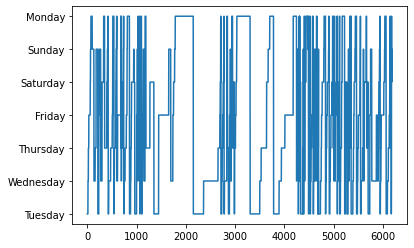

In [52]:
plt.plot(df['day_name'])